In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from itertools import zip_longest



In [30]:
goal = 800000

years = {0: [],
         1: [],
         2: [],
         3: []}

saving_trajs = {0: [],
                1: [],
                2: [],
                3: []}


for lifestyles in range(4):
    for yr in range(1000):
        i=0
        retirement_funds = 20000
        traj = []
        while retirement_funds < goal:
            market_return = np.random.normal(0.08, 0.12)
            traj.append(retirement_funds)
            retirement_funds *= (1 + market_return)
            retirement_funds += (5000 * (1 + .02) ** i)
            if lifestyles in [1,3]: retirement_funds = retirement_funds - 600
            if lifestyles in [2,3]:
                if yr == 10: retirement_funds = retirement_funds - 30000
            i += 1
            # print(retirement_funds)
        saving_trajs[lifestyles].append(traj)
        years[lifestyles].append(i)

print('Number of years to retire:\nNo expense: {}\nSubscriptions: {}\nBig Expense: {}\nBoth: {}'.format(np.mean(years[0]),np.mean(years[1]),np.mean(years[2]),np.mean(years[3])))

Number of years to retire:
No expense: 30.47
Subscriptions: 31.566
Big Expense: 65.9
Both: 67.364


In [31]:
traj_arrays = {0: [],
                1: [],
                2: [],
                3: []}

traj_arrays[0] = np.array(list(zip_longest(*saving_trajs[0], fillvalue=np.nan))).T
traj_arrays[1] = np.array(list(zip_longest(*saving_trajs[1], fillvalue=np.nan))).T
traj_arrays[2] = np.array(list(zip_longest(*saving_trajs[2], fillvalue=np.nan))).T
traj_arrays[3] = np.array(list(zip_longest(*saving_trajs[3], fillvalue=np.nan))).T

In [34]:
np.nanmean(traj_arrays[2],axis=0).shape

(35414,)

Text(0.5, 1.0, 'Savings Trajectories')

/Users/sunaybhat/miniconda3/envs/random/lib/python3.8/site-packages/matplotlib/axes/_base.py:2919: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


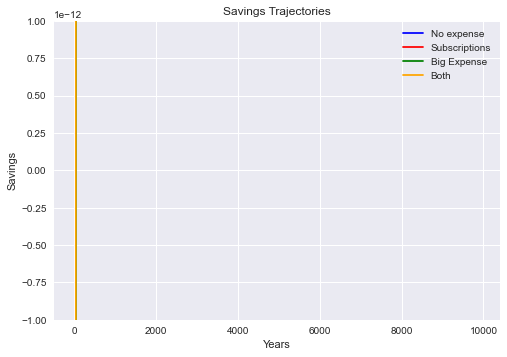

In [26]:
for i in range(10):
    if i == 0:
        plt.plot(np.nanmean(traj_arrays[0],axis=0), label='No expense',c='blue')
        plt.plot(np.nanmean(traj_arrays[1],axis=0), label='Subscriptions',c='red')
        plt.plot(np.nanmean(traj_arrays[2],axis=0), label='Big Expense',c='green')
        plt.plot(np.nanmean(traj_arrays[3],axis=0), label='Both',c='orange')
    # elif i !=0:
    #     plt.plot(saving_trajs[0][i], c='blue',alpha=0.02)
    #     plt.plot(saving_trajs[1][i], c='red',alpha=0.02)
    #     plt.plot(saving_trajs[2][i], c='green',alpha=0.02)
    #     plt.plot(saving_trajs[3][i], c='orange',alpha=0.02)
plt.legend()
plt.xlabel('Years')
plt.ylabel('Savings')
plt.title('Savings Trajectories')

In [27]:
np.nanmean(traj_arrays[3],axis=0)

array([20000.        , 26046.60148571, 32693.38295707, ...,
                 -inf,           -inf,           -inf])